In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
#We request the url text with Mexico´s info
website_url_Mexico = requests.get("https://en.wikipedia.org/wiki/Demographics_of_Mexico").text

In [3]:
#And we make the Mexico´s url a Beutifulsoup
soup = BeautifulSoup(website_url_Mexico)
#Using soup.find we look out for the table with "toccolours" attribute and "th" or "td" class
table = soup.find('table', attrs={'class': 'toccolours'})
years = table.find_all("th")
population = table.find_all("td")

In [4]:
#We create a list in which we append the year values from the table
year = []
for yr in years:
    year.append(yr.getText())
#And we take from the 4th value on wards.
year = year[4:]

In [5]:
#We take the population data from the table as well
year_pop = []
for yrp in population:
    year_pop.append(yrp.getText())
#We eliminate from the list every value that we dont need
year_pop = [y for y in year_pop if str("%") not in y]
year_pop[0] = year_pop[0].split("[")[0]
#And finally we get all digits using re library and continue eliminating other values
year_pop_list = []
for i in year_pop:
    year_pop_list.append("".join(re.findall(r"\d{1,2}", i)))
year_pop_list=[y for y in year_pop_list if y != ""]

In [6]:
#DataFrame with Mexico´s data 
df_Mexico = pd.DataFrame(year_pop_list,year , columns= ["Population Mexico"])
df_Mexico.head()

,Population Mexico
1865,8259080
1910,15160369
1921,14334780
1930,16552722
1940,19653552


In [7]:
#We request the url text with Colombia´s info
website_url_Colombia = requests.get("https://en.wikipedia.org/wiki/Demographics_of_Colombia").text

In [8]:
#And we make the Colombia´s url a Beutifulsoup
soup = BeautifulSoup(website_url_Colombia)
table = soup.find('table', attrs={'class': 'toccolours'})
#Using soup.find we look out for the table with "toccolours" attribute and "th" or "td" class
years = table.find_all("th")
population = table.find_all("td")

In [9]:
#We create a list in which we append the year values from the table
year = []
for yr in years:
    year.append(yr.getText())
year = year[4:]
year = [y.split("*")[0] for y in year]

In [10]:
#And we take the population data from the table as well
year_pop = []
for yrp in population:
    year_pop.append(yrp.getText())
#We eliminate from the list every value that we dont need    
year_pop = [y for y in year_pop if str("%") not in y]
#And finally we get all the digits and continue eliminating other values
year_pop_list = []
for i in year_pop:
    year_pop_list.append("".join(re.findall(r"\d{1,2}", i)))
year_pop_list=[y for y in year_pop_list if y != ""]
year_pop_list = year_pop_list[:-1]

In [11]:
#DataFrame with Colombia´s data
df_Colombia = pd.DataFrame(year_pop_list,year , columns= ["Population Colombia"])
df_Colombia.head()

,Population Colombia
1864,1694487
1870,2681637
1905,4533777
1912,5472604
1918,5855077


In [12]:
#We transform the index into datetime type
df_Colombia.index = pd.to_datetime(df_Colombia.index).year
df_Mexico.index = pd.to_datetime(df_Mexico.index).year

In [13]:
#Populations to numeric because we are dealing with strings and we need integers
df_Colombia = pd.to_numeric(df_Colombia["Population Colombia"])
df_Mexico = pd.to_numeric(df_Mexico["Population Mexico"])

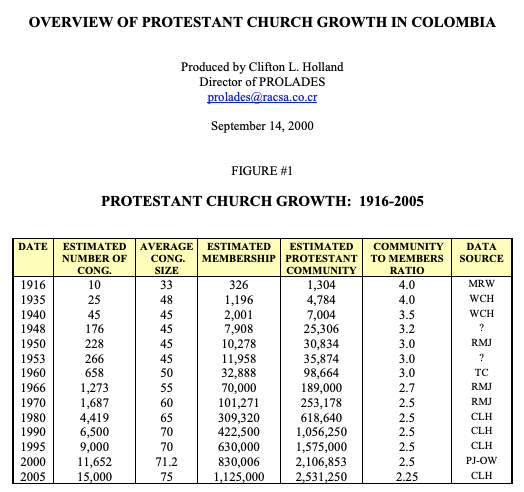

In [14]:
#We open the images that contain tabular data of the churches from each country
img_Colombia  = Image.open("Colombia.PNG")
# Link : http://www.prolades.com/cra/regions/sam/col/colombia.pdf
img_Colombia

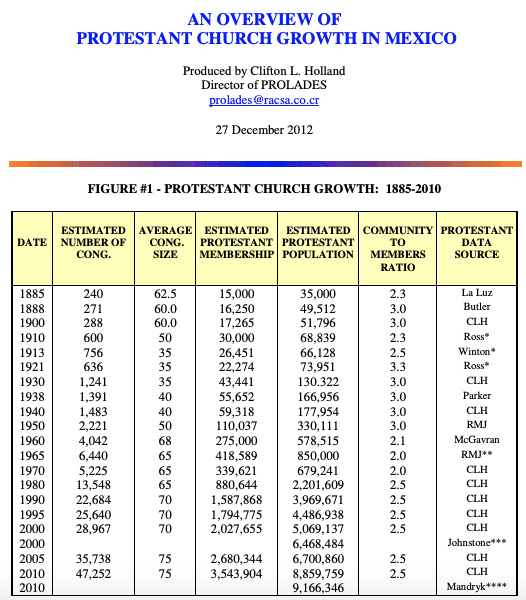

In [15]:
#Mexico church tabular data
img_Mexico = Image.open("Mexico.PNG")
# Link : http://www.prolades.com/cra/regions/nam/mexico/tables-mex-prot.pdf
img_Mexico

In [16]:
#And we create arrays with those values
Col_protestan_community = [1304,4784,7004,25306,30834,35874,98664,189000,253178,618640,1056250,1575000,2106853,2531250]
Col_protestan_year = [1916,1935,1940,1948,1950,1953,1960,1966,1970,1980,1990,1995,2000,2005]
Mex_protestan_community = [35000,49512,51796,68839,66128,73951,130322,166956,177954,330111,578515,850000,679241,2201609,3969671,4486938,5069137,6700860,8859759]
Mex_protestan_year = [1885,1888,1900,1910,1913,1921,1930,1938,1940,1950,1960,1965,1970,1980,1990,1995,2000,2005,2010]

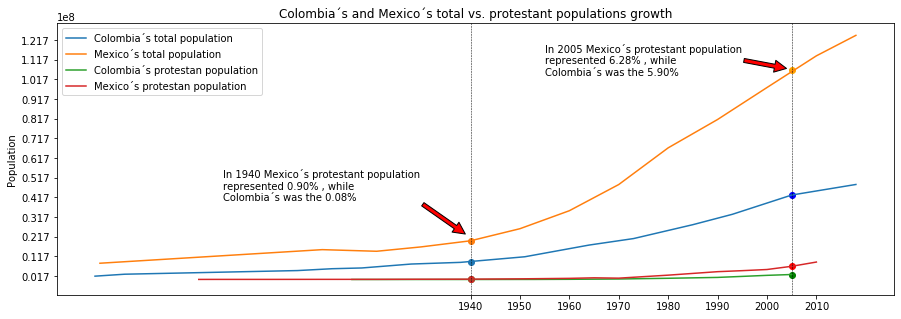

In [17]:
#Finally we create a figure using matplotlib
plt.figure(figsize=(15,5))
plt.plot(df_Colombia.index ,df_Colombia.values , label = "Colombia´s total population")
plt.plot(df_Mexico.index ,df_Mexico.values , label = "Mexico´s total population")
plt.plot(Col_protestan_year,Col_protestan_community , label = "Colombia´s protestan population")
plt.plot(Mex_protestan_year,Mex_protestan_community , label = "Mexico´s protestan population")
plt.yticks(np.arange(df_Colombia.values[0], df_Mexico.values[-1]+10000000, 10000000))
plt.xticks(np.arange(1940, 2020,10))
#And in the figure we highlight special values as scatter points
plt.scatter(1940,8701816)
plt.scatter(1940,19653552)
plt.scatter(1940,7004)
plt.scatter(1940,177954)
plt.scatter(2005,42888592, color = "blue")
plt.scatter(2005,106580528, color = "orange")
plt.scatter(2005,2531250, color = "green")
plt.scatter(2005,6700860, color = "red")
plt.axvline(x=2005 , color = "black" ,linestyle ="--", linewidth = 0.5)
plt.axvline(x=1940 , color = "black" ,linestyle ="--", linewidth = 0.5)
#Finally we use arrows and comments (annotations) , set titles , legend and label
plt.annotate('In 1940 Mexico´s protestant population\nrepresented 0.90% , while\nColombia´s was the 0.08%', xy = (1939,23000000),
             xytext = (1940-50, 7004+40000000),
             arrowprops=dict(facecolor='red',shrink=0.005))
plt.annotate('In 2005 Mexico´s protestant population\nrepresented 6.28% , while\nColombia´s was the 5.90%', xy = (2004,107152080),
             xytext = (2005-50, 103781528),
             arrowprops=dict(facecolor='red',shrink=0.005))
plt.ylabel("Population")
plt.title("Colombia´s and Mexico´s total vs. protestant populations growth")
plt.legend(loc = "upper left")

plt.show()